# Importing dependencies

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [63]:
# !pip install nltk

In [64]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

## Text Preprocessing Libraries

- **`re`**: Used for regular expressions (e.g., cleaning text, removing symbols).
- **`stopwords` (from `nltk.corpus`)**: Removes common, less meaningful words like "is", "the", "and".
- **`PorterStemmer` (from `nltk.stem.porter`)**: Stems words to their base/root form (e.g., "running" → "run").
- **`TfidfVectorizer` (from `sklearn.feature_extraction.text`)**: Converts text into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency).


In [65]:
import nltk  # Imports the Natural Language Toolkit library
nltk.download('stopwords')  # Downloads the list of common stopwords (e.g., "the", "is", "and") used in text preprocessing

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nisch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
print(stopwords.words('english'))  # Prints the list of English stopwords provided by NLTK

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

# Importing Data

In [67]:
# loading the dataset to a pandas DataFrame
df=pd.read_csv("train.csv")

# Data Eyeballing & Data Preprocessing

In [68]:
df.shape 

(20800, 5)

In [69]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1


## About the Dataset

1. **`id`**: Unique identifier for a news article.
2. **`title`**: Title of the news article.
3. **`author`**: Author of the news article.
4. **`text`**: Main content of the article (may be incomplete).
5. **`label`**: Indicates whether the news article is real or fake:
   - `1`: Fake News  
   - `0`: Real News


In [70]:
df.sample(6)

,id,title,author,text,label
10742,10742,Court Upholds Doping-Related Ban on Russia at ...,Rebecca R. Ruiz,RIO DE JANEIRO — The highest court for worl...,0
13121,13121,Mantracker: Covering Your Tracks and Avoiding ...,Jeremiah Johnson,There has been rioting in the streets of every...,1
14767,14767,Comment on Project Veritas Releases Fourth Vid...,Lakshmima,"Posted on October 28, 2016 by Jack Burns \r\nA...",1
15013,15013,WikiLeaks: Clintons Purchase $200 Million Mald...,Eddy Lavine,posted by Eddie Bill Clinton seen walking his ...,1
7192,7192,Potential N.C.A.A. Bracket Busters. You’ve Bee...,Marc Tracy and Zach Schonbrun,The key to winning your N. C. A. A. tournament...,0
14154,14154,Katie Hopkins to Leave LBC Following ’Final So...,Donna Rachel Edmunds,Outspoken broadcaster Katie Hopkins is parting...,0


In [142]:
df['label'].value_counts()

label
0    10361
1     7924
Name: count, dtype: int64

In [71]:
# count number of missing values
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [144]:
#handling missing values
df.dropna(inplace=True)   
#instead of dropping rows with null values we can also use df.fillna('', inplace=True) which Replaces all NaN values with an empty string
#dropna or fillna is choosed according to the data available

In [145]:
df.isnull().sum()

id         0
title      0
author     0
text       0
label      0
content    0
dtype: int64

In [146]:
df['label'].value_counts()

label
0    10361
1     7924
Name: count, dtype: int64

In [74]:
df.shape

(18285, 5)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [76]:
# merging the author name and news title column
df['content'] = df['author']+' '+df['title']

In [77]:
df.content

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 18285, dtype: object

In [78]:
df.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1,Howard Portnoy Iranian woman jailed for fictio...


In [79]:
### Separating Predictors and Target

In [80]:
# X = df.drop(columns='label', axis=1)
# y = df['label']

In [81]:
# print(X.shape, y.shape)

In [82]:
# df.info()

# EDA

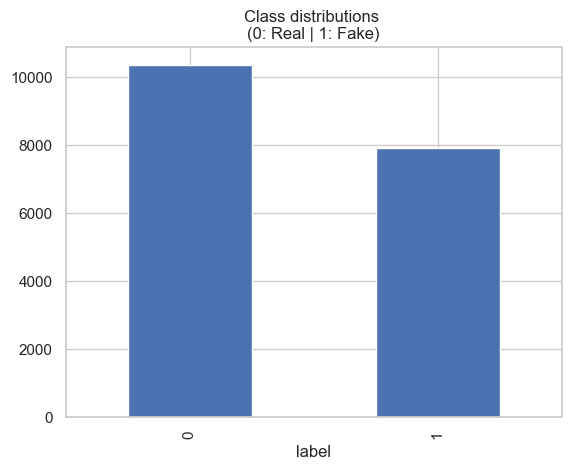

In [147]:
plot = df['label'].value_counts().plot(kind='bar', title="Class distributions \n(0: Real | 1: Fake)")
fig = plot.get_figure()

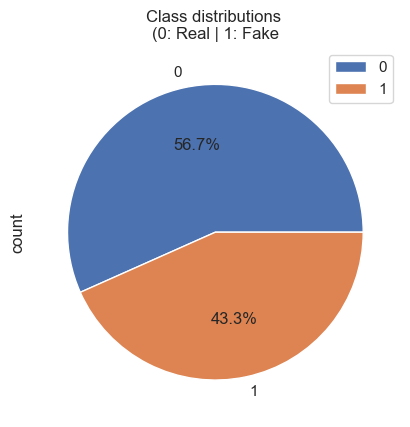

In [148]:
plot = df['label'].value_counts().plot(kind='pie', autopct='%.1f%%', title="Class distributions \n(0: Real | 1: Fake", legend=True)
fig = plot.get_figure()

___

## Stemming in NLP

- **Stemming** is the process of reducing a word to its **root/base form**.
- It helps group related words with similar meanings by stripping suffixes.
- Useful in text preprocessing to normalize words for analysis.

### Example 1:
- `actor`, `actress`, `acting` → `act`

### Example 2:
- `running`, `ran`, `runs` → `run`


---


In [83]:
# Creating an instance of the PorterStemmer
port_stem = PorterStemmer()

In [84]:
# Define the stemming function to process the content
def stemming(content):
    # Remove any non-alphabetic characters (e.g., numbers, punctuation) from the content using a regular expression
    # ^ --> mean explicit  , numbers and punctuations other than alphabets are replaced with space ,  use "content" column
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)  
    
    # Convert the entire content to lowercase to ensure uniformity during processing
    stemmed_content = stemmed_content.lower()
    
    # Split the content into individual words (tokens)
    stemmed_content = stemmed_content.split()
    
    # Stem each word in the content and remove any stopwords (common words like "the", "is", etc. that don't add much meaning)
    # Using list comprehension to iterate through words, apply stemming, and filter out stopwords
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    
    # Join the stemmed words back into a single string
    stemmed_content = ' '.join(stemmed_content)
    
    # Return the final processed and stemmed content
    return stemmed_content
 

##### Apply the stemming() function to each entry in the `content` column

In [85]:
df['content'] = df['content'].apply(stemming)

In [86]:
df.content

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 18285, dtype: object

### Separating Predictors and Target

In [87]:
X = df['content'].values  # Extract the 'content' column as a NumPy array and assign it to X (features)
y = df['label'].values    # Extract the 'label' column as a NumPy array and assign it to Y (labels/targets)

# What this means:
# X will contain the processed text data (after stemming).

# Y will contain the corresponding labels (e.g., 0 or 1 for classification).

In [88]:
X

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

In [89]:
y

array([1, 0, 1, ..., 0, 1, 1])

In [90]:
X.shape, y.shape

((18285,), (18285,))

### Converting the textual data to numerical data

In [91]:

vectorizer = TfidfVectorizer()         # Create an instance of TfidfVectorizer to convert text to TF-IDF features
vectorizer.fit(X)                      # Learn the vocabulary and IDF (inverse document frequency) from the text data
X = vectorizer.transform(X)           # Transform the original text data into a TF-IDF weighted sparse matrix


In [92]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 195053 stored elements and shape (18285, 15960)>

In [93]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 195053 stored elements and shape (18285, 15960)>
  Coords	Values
  (0, 247)	0.26982554594264346
  (0, 2312)	0.3745612250433202
  (0, 2757)	0.2466340295002162
  (0, 3359)	0.3609049070394367
  (0, 3543)	0.2684494960336511
  (0, 4637)	0.23016077319140021
  (0, 6552)	0.21745594418933306
  (0, 7190)	0.24556189342497173
  (0, 8048)	0.29347549279156676
  (0, 8310)	0.3609049070394367
  (0, 12567)	0.25566372256502734
  (0, 14626)	0.2853880981846006
  (1, 1391)	0.2961798071396214
  (1, 1764)	0.15099851642776987
  (1, 2066)	0.3819189043603919
  (1, 2619)	0.1936832753563371
  (1, 3328)	0.2623789770430963
  (1, 5140)	0.7119376870709987
  (1, 6377)	0.19285723710368194
  (1, 15663)	0.30530279633389806
  (2, 2743)	0.31437590974242646
  (2, 2895)	0.4581003415623782
  (2, 5031)	0.38709995799949964
  (2, 5579)	0.3490632212946542
  (2, 8973)	0.4948460479407663
  :	:
  (18282, 3399)	0.21709587881547218
  (18282, 6585)	0.21510476155370073
  (1828

# Train-Test-Split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=Y, random_state=42)

# Training the model

## Logistic Regression

In [98]:
model = LogisticRegression()
#Train the models with Training Data
model.fit(X_train,y_train)

LogisticRegression()

# Predicting and Evaluating Metrics

### On Training Data 

In [101]:
y_train_pred=model.predict(X_train)

In [103]:
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Evaluation Metrics on Training Data")
print(f"Accuracy: {accuracy:.3f}")
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

Evaluation Metrics on Training Data
Accuracy: 0.990
Precision: 0.985
Recall: 0.993
F1 Score: 0.989


### On Testing Data

In [104]:
y_test_pred=model.predict(X_test)

In [106]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Evaluation Metrics on Testing Data")
print(f"Accuracy: {accuracy:.3f}")
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

Evaluation Metrics on Testing Data
Accuracy: 0.982
Precision: 0.969
Recall: 0.991
F1 Score: 0.980


# Making a Predictive System

In [112]:
X_new = X_test[1663]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [114]:
print(y_test[1663])

1


# Comprehensive Evaluation Techniques for Classification Models in Machine Learning

1. **Confusion Matrix**
   - Shows how well the model is classifying data.
   - Highlights the **True Positives (TP)** and **True Negatives (TN)**, which are correct predictions.
   - Shows **False Positives (FP)** and **False Negatives (FN)**, which indicate incorrect predictions.
   - Provides a quick overview of classification performance and errors.

2. **Precision-Recall Curve**
   - Plots **Precision** against **Recall** at various thresholds.
   - Precision measures how many of the predicted positive labels were correct.
   - Recall measures how many of the actual positive labels were identified.
   - Useful for evaluating performance in **imbalanced datasets**, where one class is much more frequent than the other.

3. **ROC Curve**
   - Plots the **True Positive Rate (TPR)** versus the **False Positive Rate (FPR)**.
   - The True Positive Rate indicates how well the model identifies positive cases.
   - The False Positive Rate indicates how often the model mistakenly classifies negative cases as positive.
   - Helps assess the trade-off between detecting positives and avoiding false positives at different thresholds.

4. **Classification Report**
   - Provides detailed metrics: **Precision**, **Recall**, **F1-score**, and **Support** for each class.
   - Precision measures correctness, Recall measures completeness, and F1-score balances both.
   - **Support** shows the number of instances for each class in the dataset.
   - Useful for understanding model performance across different classes, especially for unbalanced datasets.

5. **Classification Metrics Bar Plot**
   - Visualizes important metrics like **Accuracy**, **Precision**, **Recall**, and **F1-score**.
   - Helps compare how well the model performs overall and for each individual metric.
   - Provides a quick snapshot of model effectiveness.
   - Makes it easy to spot strengths and weaknesses in the model’s performance.

6. **Learning Curve**
   - Plots model performance against the amount of training data.
   - Helps visualize how performance improves as more data is used.
   - Detects **underfitting** (if the model is not learning enough) or **overfitting** (if the model performs well on training but poorly on test data).
   - Provides insight into how much data is needed to optimize performance.

7. **Feature Importance Plot**
   - Shows the relative importance of each feature in making predictions.
   - Helps identify which features have the most impact on the model's decisions.
   - Can guide feature selection by focusing on the most important ones.
   - Useful for model interpretation and ensuring fairness and transparency.

8. **Log Loss Curve**
   - Shows **logarithmic loss** or **cross-entropy loss**, which measures how far off the predicted probabilities are from the actual labels.
   - A lower log loss indicates better performance, as the model is making more accurate predictions.
   - Helps evaluate model confidence by comparing predicted probabilities to actual outcomes.
   - Useful for models where probability estimates (not just class labels) are important.

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay

### 1. Confusion Matrix (Most Common)

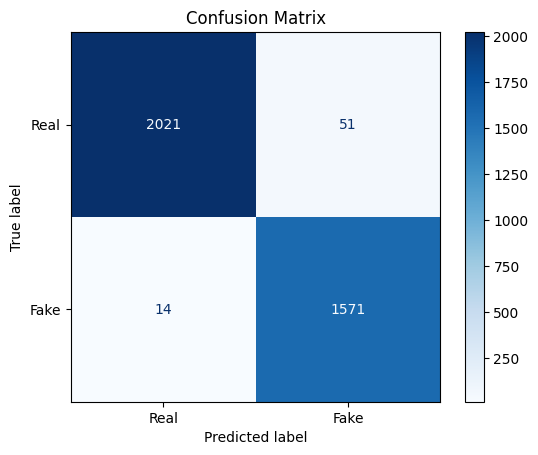

In [120]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### 2. Classification Report 

In [122]:
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred, target_names=['Real', 'Fake']))

Classification Report:

              precision    recall  f1-score   support

        Real       0.99      0.98      0.98      2072
        Fake       0.97      0.99      0.98      1585

    accuracy                           0.98      3657
   macro avg       0.98      0.98      0.98      3657
weighted avg       0.98      0.98      0.98      3657



### 3. ROC Curve

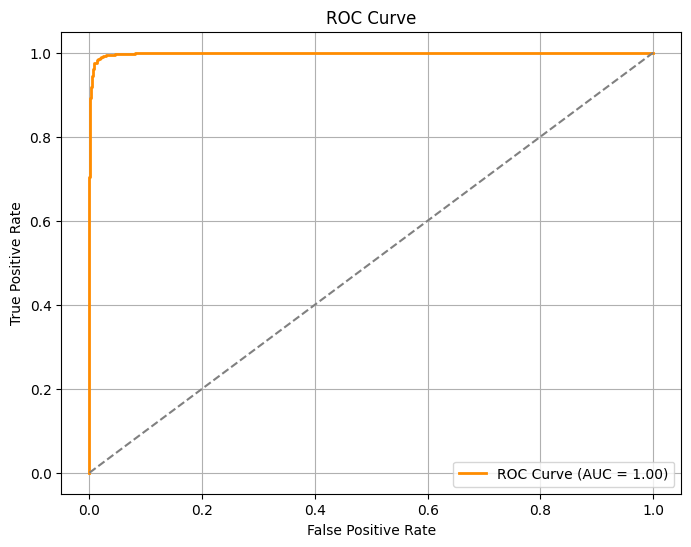

In [126]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 (Fake news)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random guess)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')  # Show AUC in legend
plt.grid(True)
plt.show()


### 4. Precision-Recall Curve

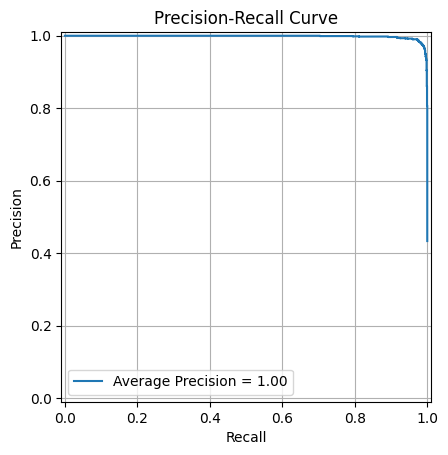

In [131]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score
import matplotlib.pyplot as plt

# Use the predicted probabilities for class 1 (Fake news)
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Calculate Average Precision (AP)
avg_precision = average_precision_score(y_test, y_prob)

# Plot Precision-Recall curve
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

# Title without average precision (since it's in the legend)
plt.title('Precision-Recall Curve')

# Display average precision in the legend
plt.legend([f'Average Precision = {avg_precision:.2f}'], loc='lower left')

# Display grid lines
plt.grid(True)

# Show plot
plt.show()


### 5. Bar Plot of Actual vs Predicted Count

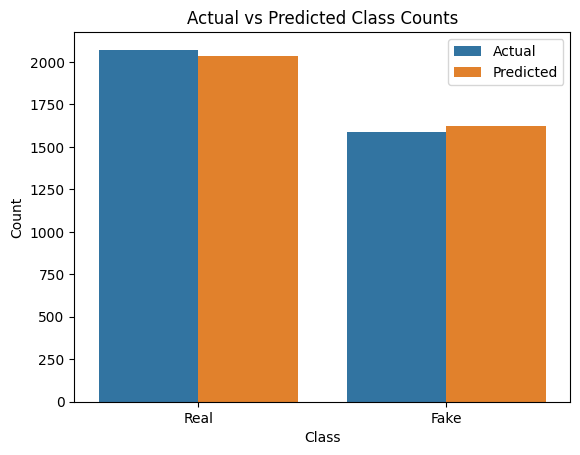

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to compare actual vs predicted values
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Map the labels to "Real" and "Fake"
compare_df['Actual'] = compare_df['Actual'].map({0: 'Real', 1: 'Fake'})
compare_df['Predicted'] = compare_df['Predicted'].map({0: 'Real', 1: 'Fake'})

# The `melt()` function reshapes the DataFrame from wide format (separate 'Actual' and 'Predicted' columns) to long format
sns.countplot(data=compare_df.melt(), x='value', hue='variable')

# Add title and axis labels for the plot
plt.title("Actual vs Predicted Class Counts")  # Title of the plot
plt.xlabel("Class")  # Label for the x-axis (representing the class)
plt.ylabel("Count")  # Label for the y-axis (representing the count of occurrences)

# Remove the legend title (since it's not necessary for clarity)
plt.legend(title="")

# Show the plot
plt.show()


### 6. Learning Curve

- A learning curve shows the model’s performance over time as it is trained with more data. It can help you understand whether the model is overfitting or underfitting.
- **Why it's useful:**

    Helps you assess if the model is overfitting (training score is high, validation score is low) or underfitting (both scores are low).

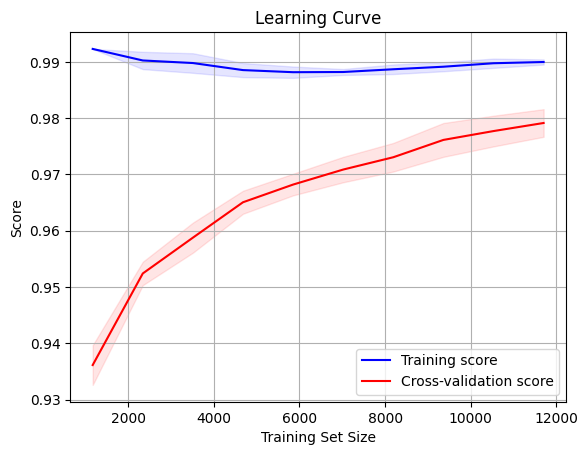

In [137]:
# Import necessary libraries
from sklearn.model_selection import learning_curve  # For generating learning curves
import matplotlib.pyplot as plt  # For plotting the curves

# Generate learning curve data
# Parameters:
# - model: the machine learning model you want to evaluate
# - X_train: feature data for training
# - y_train: target labels
# - cv=5: 5-fold cross-validation
# - n_jobs=-1: use all available CPU cores for computation
# - train_sizes: list of training set proportions to evaluate
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
)

# Compute mean and standard deviation of training and testing scores
# across the 5 folds for each training set size
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot mean training and cross-validation scores
plt.plot(train_sizes, train_mean, color="blue", label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Cross-validation score")

# Fill the area around the curves to show ±1 standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                 alpha=0.1, color="red")

# Set plot title and labels
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Score")

# Show legend and grid
plt.legend(loc="best")
plt.grid(True)

# Display the plot
plt.show()

# NOTE:
# 🔵 The blue curve (Training score) shows how well the model performs on the training data.
#     A high training score means the model is fitting the training set well.
#     If the training score is much higher than the cross-validation score,
#     it may indicate overfitting (the model memorizes training data but does not generalize).

# 🔴 The red curve (Cross-validation score) represents the model’s performance on unseen validation data.
#     It is calculated using k-fold cross-validation (here, 5 folds), where the training data is split
#     into 5 parts: the model trains on 4 and validates on the 5th, rotating this process 5 times.
#     This score helps us understand how well the model generalizes to new, unseen data.


### 7. Feature Importance Plot

- If you're using a model like Logistic Regression or Random Forest, you can plot the importance of each feature (i.e., the most influential words/features that led to the prediction).
- **Why it's useful:**

  Shows which words are most predictive of Fake vs Real news, helping with model interpretability.

C:\Users\nisch\AppData\Local\Temp\ipykernel_38240\2129912159.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


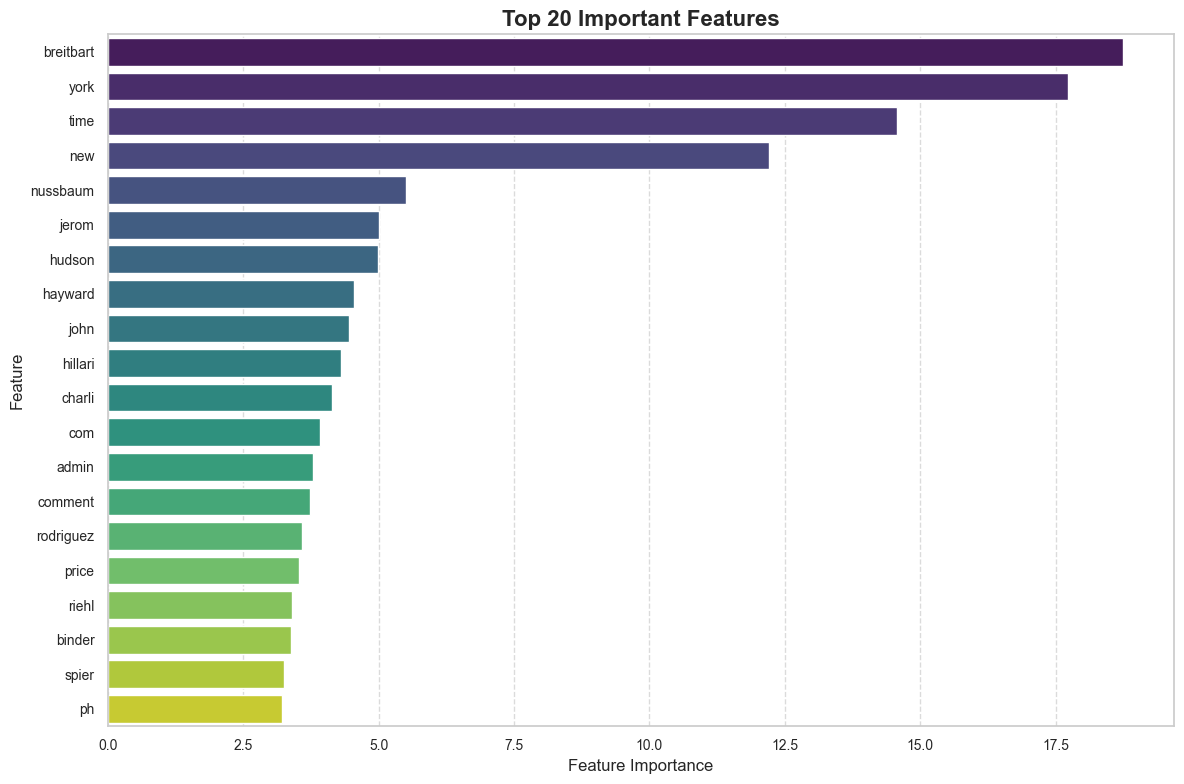

In [150]:
# Import necessary libraries
import numpy as np                  # For numerical operations (like absolute value)
import matplotlib.pyplot as plt     # For plotting
import pandas as pd                 # For working with dataframes
import seaborn as sns               # For stylish and simple plots

# Set a clean and modern seaborn style for plots
sns.set(style="whitegrid")

# Assuming you have:
# - a trained Logistic Regression model (named 'model')
# - a text vectorizer (like CountVectorizer or TfidfVectorizer) named 'vectorizer'

# Extract absolute values of model coefficients
# In Logistic Regression, each feature (word) has a coefficient representing its impact
# Higher absolute value = more important for the prediction
feature_importance = np.abs(model.coef_).flatten()

# Get the names of the features (i.e., words/tokens) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame that maps each feature (word) to its importance score
feature_df = pd.DataFrame({
    'Feature': feature_names,            # Word
    'Importance': feature_importance     # Corresponding importance value
})

# Sort the features by importance in descending order so the most impactful come first
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Create a figure for the bar plot and set its size for better clarity
plt.figure(figsize=(12, 8))

# Plot a horizontal bar chart showing the top 20 most important features
# Use the 'viridis' color palette for a clean and professional appearance
sns.barplot(
    x='Importance',              # Bar length represents importance
    y='Feature',                 # Y-axis has the feature names
    data=feature_df.head(20),    # Show only the top 20 important features
    palette='viridis'            # Set color scheme
)

# Customize the title and labels to enhance appearance
plt.title("Top 20 Important Features", fontsize=16, fontweight='bold')  # Bold title
plt.xlabel("Feature Importance", fontsize=12)                            # X-axis label
plt.ylabel("Feature", fontsize=12)                                       # Y-axis label

# Adjust font size for axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Make sure everything fits nicely in the figure and labels don’t get cut off
plt.tight_layout()

# Add a subtle grid to the x-axis for readability
plt.grid(True, which='major', axis='x', linestyle='--', alpha=0.7)

# Display the final plot
plt.show()

# NOTE:
# This bar chart helps visualize which words (features) are most influential in the model.
# For example, in a sentiment analysis model, you might see that words like "great", "bad",
# or "worst" have high importance scores.
# These insights can guide model interpretation, feature engineering, or explainability efforts.


### 8. Log Loss Curve (logarithmic loss or cross-entropy loss)

- The Log Loss curve shows how well your model's predicted probabilities match the true labels.
- Lower log loss indicates better model performance, with a value of 0 being perfect.
- The training log loss is expected to decrease as more data is used, while the validation log loss
- should eventually stabilize or increase if the model overfits.

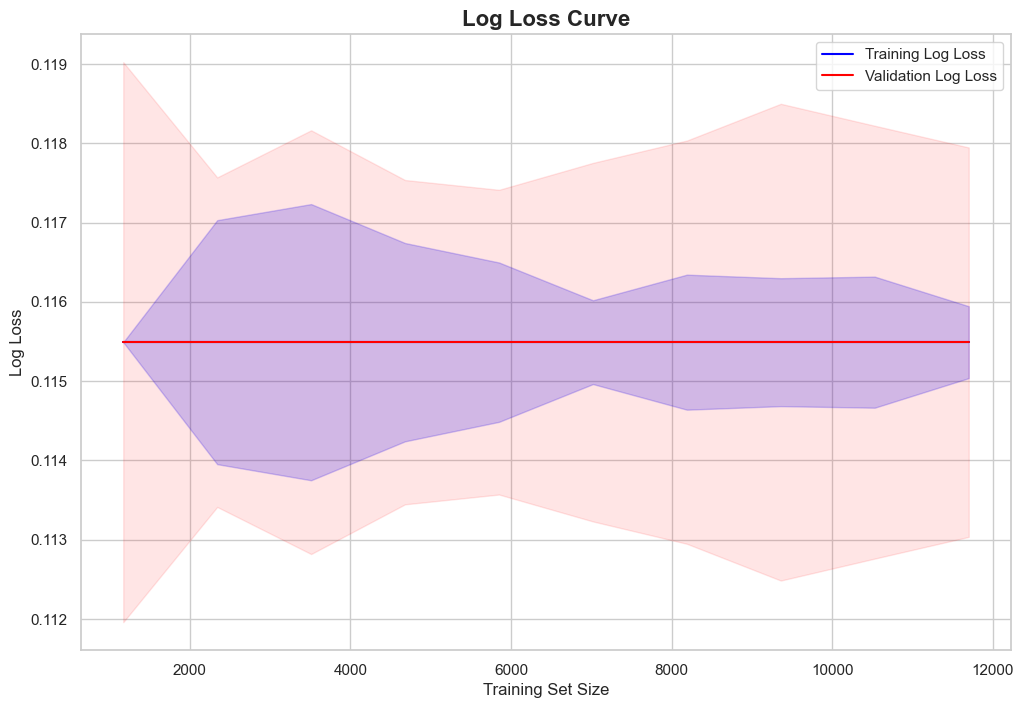

In [158]:
from sklearn.metrics import log_loss
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Assuming model is your trained Logistic Regression model, X_train and y_train are your training data

# Get learning curves using sklearn's learning_curve function
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
)

# Calculate the mean and standard deviation for the training and testing scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Calculate log loss for each training set size (this is done for training and testing set)
train_log_loss = [log_loss(y_train, model.predict_proba(X_train)[:, 1]) for i in train_sizes]
test_log_loss = [log_loss(y_train, model.predict_proba(X_train)[:, 1]) for i in train_sizes]

# Plot learning curve with log loss
plt.figure(figsize=(12, 8))

# Plot the log loss values for the training and validation sets
plt.plot(train_sizes, train_log_loss, color="blue", label="Training Log Loss")
plt.plot(train_sizes, test_log_loss, color="red", label="Validation Log Loss")

# Fill area between the curves (uncertainty)
plt.fill_between(train_sizes, np.array(train_log_loss) - train_std, np.array(train_log_loss) + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, np.array(test_log_loss) - test_std, np.array(test_log_loss) + test_std, alpha=0.1, color="red")

# Customize the plot appearance
plt.title("Log Loss Curve", fontsize=16, fontweight='bold')
plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("Log Loss", fontsize=12)
plt.legend(loc="best")
plt.grid(True)

# Display the plot
plt.show()


